time to generate solutions:  4.6168739795684814


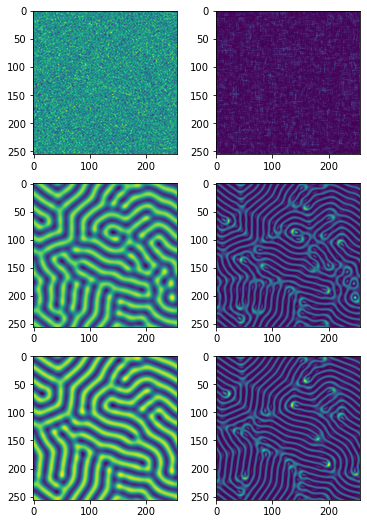

In [6]:
import matplotlib.pyplot as plt
import scipy.io as sio
import numpy as np
import sys
sys.path.append('/Users/edwardmcdugald/Research/convection_patterns_wip/code/numerics/')
import convection_patterns as cp

cp.solveSH(25*np.pi,25*np.pi,256,256,.5,100,"SH1_2",Rscale=.5,beta=.45,amplitude=.1,init_flag=1,energy=True)

data1 = sio.loadmat("/Users/edwardmcdugald/Research/convection_patterns_wip/code/data/SH1_2.mat")
U1 = data1['uu']
E1 = data1['ee']
fig, ax = plt.subplots(nrows=3, ncols=2, figsize=(6,9))
ax[0,0].imshow(U1[:,:,0].T)
ax[0,1].imshow(E1[:,:,0].T)
ax[1,0].imshow(U1[:,:,100].T)
ax[1,1].imshow(E1[:,:,100].T)
ax[2,0].imshow(U1[:,:,200].T)
ax[2,1].imshow(E1[:,:,200].T)

time to generate solutions:  0.7240939140319824


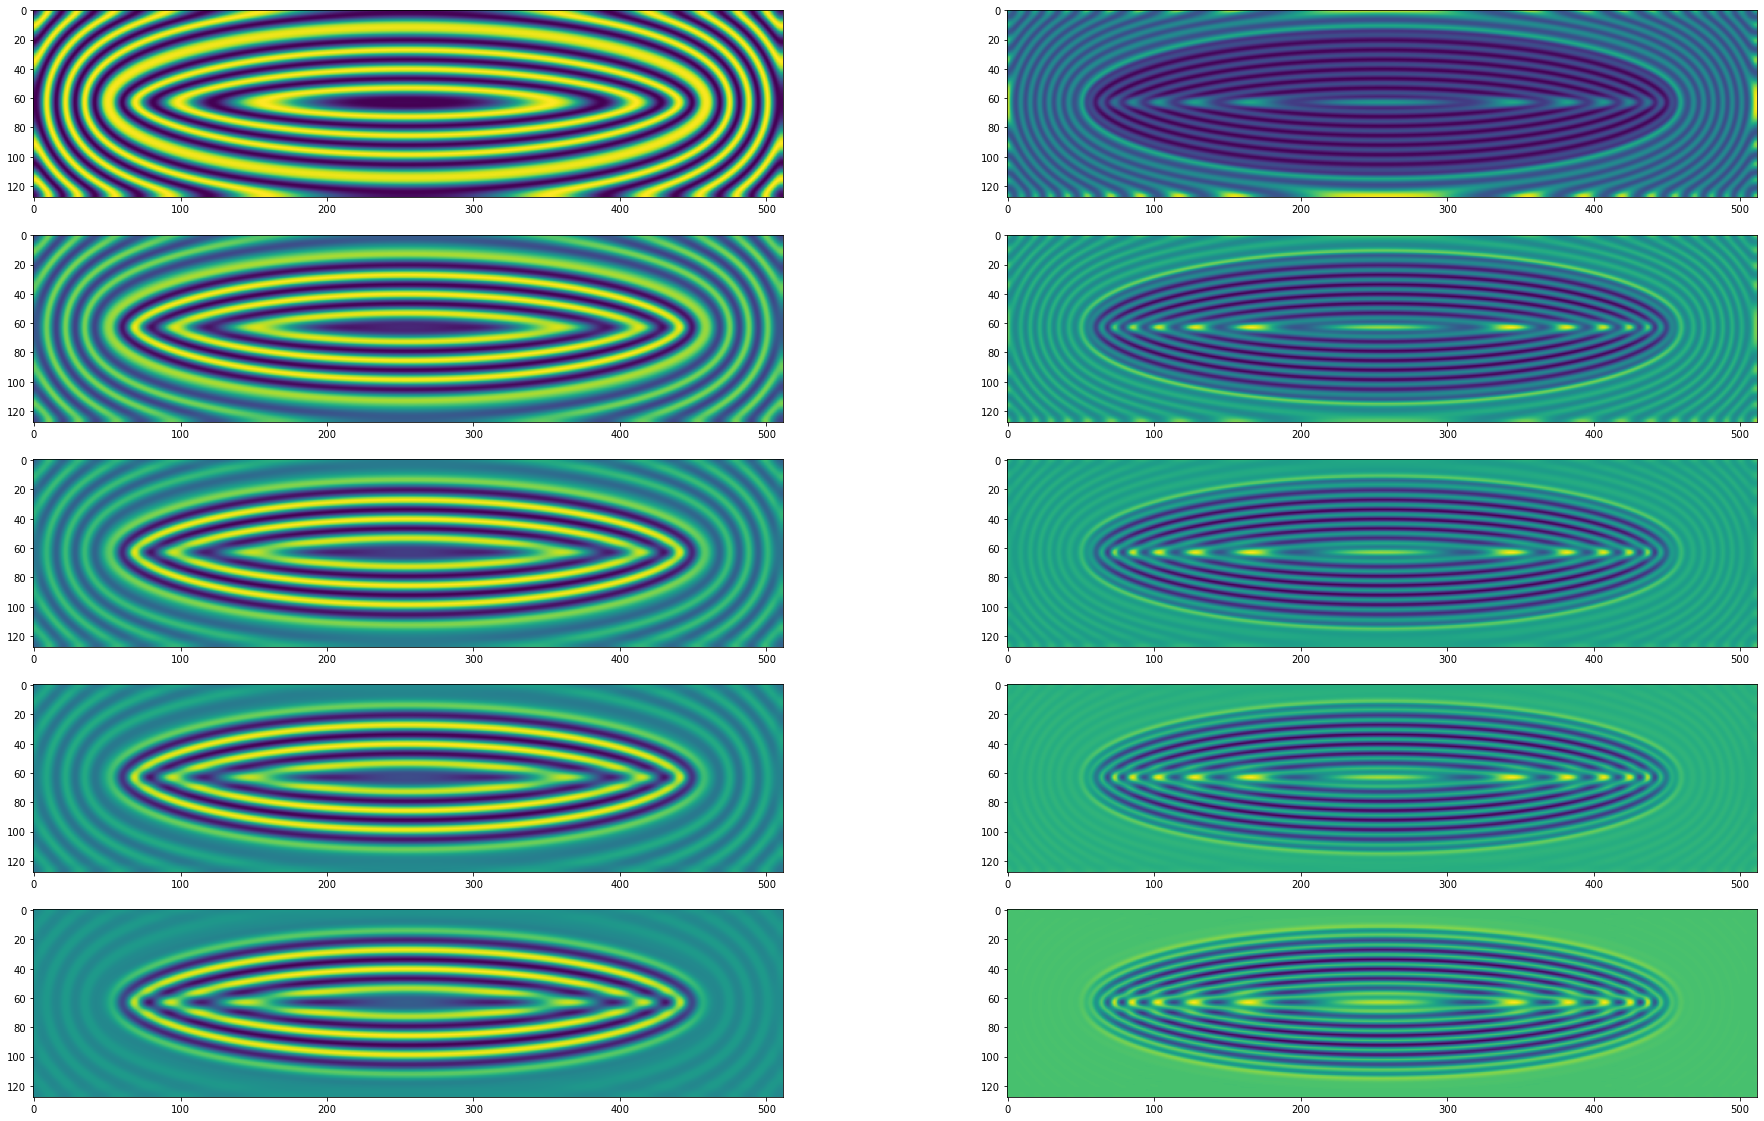

In [13]:
cp.solveSH(80*np.pi,20*np.pi,512,128,.1,3,"SH4_2",Rscale=.5,beta=.4,amplitude=.1,init_flag=3,energy=True)

data2 = sio.loadmat("/Users/edwardmcdugald/Research/convection_patterns_wip/code/data/SH4_2.mat")
U2 = data2['uu']
E2 = data2['ee']
fig, ax = plt.subplots(nrows=5, ncols=2, figsize=(32,20))
ax[0,0].imshow(U2[:,:,0].T)
ax[0,1].imshow(E2[:,:,0].T)
ax[1,0].imshow(U2[:,:,5].T)
ax[1,1].imshow(E2[:,:,5].T)
ax[2,0].imshow(U2[:,:,10].T)
ax[2,1].imshow(E2[:,:,10].T)
ax[3,0].imshow(U2[:,:,15].T)
ax[3,1].imshow(E2[:,:,15].T)
ax[4,0].imshow(U2[:,:,25].T)
ax[4,1].imshow(E2[:,:,25].T)

In [15]:
sys.path.append('/Users/edwardmcdugald/Research/convection_patterns_wip/code/ml_experiments/my_experiments')
from myPDEFIND import *
import math

t = data1['tt'].T[:,0]
x = data1['xx'].T[0,:]
y = data1['yy'].T[0,:]
U = data1['uu']

nx = len(x)
ny = len(y)
dx = x[1]-x[0]
dy = y[1]-y[0]
dt = t[1]-t[0]

num_t = 20
x_subsample = 8
y_subsample = 8
t_vals = np.arange(1,len(t),math.floor(len(t)/num_t))
x_vals = np.arange(0,nx,x_subsample)
y_vals = np.arange(0,ny,y_subsample)

num_points = num_t*len(x_vals)*len(y_vals)

u = np.zeros((num_points,1))
u_t = np.zeros((num_points,1))
u_x = np.zeros((num_points,1))
u_y = np.zeros((num_points,1))
u_xx = np.zeros((num_points,1))
u_yy = np.zeros((num_points,1))
u_xy = np.zeros((num_points,1))
lapu = np.zeros((num_points,1))
biharmu = np.zeros((num_points,1))


# setting parameters for spectral derivatives
Lx = 2*x[len(x)-1] # Size of enclosing periodic rectangle
Ly = 2*y[len(y)-1]

i=0
for t_idx in t_vals:
    uu = U[:,:,t_idx]
    uu_t = BackwardDiff(U[:,:,t_idx],U[:,:,t_idx-1],dt)
    uu_x = SpectralDerivs(U[:,:,t_idx],Lx,Ly,'x')
    uu_y = SpectralDerivs(U[:,:,t_idx],Lx,Ly,'y')
    uu_xx = SpectralDerivs(U[:,:,t_idx],Lx,Ly,'xx')
    uu_yy = SpectralDerivs(U[:,:,t_idx],Lx,Ly,'yy')
    uu_xy = SpectralDerivs(U[:,:,t_idx],Lx,Ly,'xy')
    lapuu = SpectralDerivs(U[:,:,t_idx],Lx,Ly,'laplacian')
    biharmuu = SpectralDerivs(U[:,:,t_idx],Lx,Ly,'biharmonic')
    for x_idx in x_vals:
        for y_idx in y_vals:
            u[i] = uu[x_idx,y_idx]
            u_t[i] = uu_t[x_idx,y_idx]
            u_x[i] = uu_x[x_idx,y_idx]
            u_y[i] = uu_y[x_idx,y_idx]
            u_xx[i] = uu_xx[x_idx,y_idx]
            u_yy[i] = uu_yy[x_idx,y_idx]
            u_xy[i] = uu_xy[x_idx,y_idx]
            lapu[i] = lapuu[x_idx,y_idx]
            biharmu[i] = biharmuu[x_idx,y_idx]
            i+=1

X = np.hstack([np.ones((num_points,1)), u, u**2, u**3,u**4,
                   u_x, u_y, u_x**2, u_y**2, u_x*u_y,u_xy,
               u_xx, u_yy, lapu, biharmu])
description = ['','u','u^2','u^3','u^4',
               'u_{x}','u_{y}','u_{x}^2','u_{y}^2','u_{x}u_{y}','u_{xy}'
    ,'u_{xx}', 'u_{yy}','lapu','biharmu']

c = TrainSTRidge(X,u_t,10**-5,1)
print_pde(c, description)

u_t = (-0.511470 +0.000000i)u
    + (-1.023699 +0.000000i)u^3
    + (-328.459807 +0.000000i)u_{xx}
    + (-328.459927 +0.000000i)u_{yy}
    + (326.412674 +0.000000i)lapu
    + (-1.023579 +0.000000i)biharmu
   
